***
# **APP. OPT. -- M1 MA 2020/2021 -- Université Paris-Saclay**
***


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def verifier_gradient(f,g,x0):
    N = len(x0)
    gg = np.zeros(N)
    for i in range(N):
        eps = 1e-4
        e = np.zeros(N)
        e[i] = eps
        gg[i] = (f(x0+e) - f(x0-e))/(2*eps)
    print('erreur numerique dans le calcul du gradient: %g (doit etre petit)' % np.linalg.norm(g(x0)-gg))

$$\newcommand{\nr}[1]{\|#1\|}
\newcommand{\Rsp}{\mathbb{R}}$$
$\newcommand{\sca}[2]{\langle#1|#2\rangle}$

# TP1 :  Optimisation sans contraintes
## Méthode des différences finies pour $-u'' = f$

### Existence et unicité

On veut approcher le problème $-u''=f$ avec conditions de Dirichlet : 

$$
\left\{\begin{aligned}
&-u''(x) = f(x) \hbox{ sur } (0,1) \\
&u(0) = u(1) = 0
\end{aligned}\right.$$

par le système linéaire de dimension finie 

$$
\left\{\begin{aligned}
&-\frac{1}{h^2}(u_{i-1} - 2 u_i + u_{i+1}) = f_i \hbox{ pour } 1\leq i\leq N\\
&u_{0} = 0, u_{N+1} = 0 
\end{aligned}\right.,$$

où $h = 1/(n+1)$ et $x_j = h j$ pour $0\leq j\leq n$ et $f_j = f(t_j)$. 

**Q1)** Montrer que si on pose $ U = (u_1,\dots, u_n)$ et $ F = (f_1,\dots,f_n)$, le système linéaire peut être écrit sous la forme $A_n  U = h^2 F$, où $A_n$ est une matrice symétrique et définie positive. 

Le but de ce TP est donc de proposer et comparer des méthodes de
résolution de systèmes linéaires du type $A_n x = b$, où $A$ est une
matrice **symétrique et définie positive**.
En particulier on cherche à résoudre un système linéaire
 $A_n x = b$ par des méthodes de descent de gradient en trouvant le minimiseur de 
\begin{equation}
\label{problem}
J(x) := \frac{1}{2}\sca{A_nx}{x} - \sca{b}{x}.
\end{equation}

**Q2)** On veut montrer existence et unicité.

**Q2.a)** Montrer que $J(x)\to+\infty$ quand $\nr{x}\to+\infty$ et en déduire l'existence d'un minimiseur.

**Q2.b)** Calculer $\nabla J(x)$ et $D^2J(x)$.

**Q2.c)** Montrer que  tout minimiseur $x^\star$ résout   l'équation $A_n x = b$.

**Q2.d)** Soit $x^\star$ l'unique solution de $A_n x = b$, montrer que 
$$ J(x+x^\star)=J(x^\star)+\frac{1}{2}\sca{A_nx}{x} $$
et en déduire  que $x^\star$ est l'unique minimiseur de $J$.

**Réponse:** 

**Q2.a)** Comme $A_n$ est définie positive on a la minoration suivante 
$$ \sca{x}{A_nx}\geq c\nr{x}^2 ,$$
où $c>0$.
On obtient alors
$$ J(x)\geq c\nr{x}^2-\nr{b}\nr{x},$$
où le terme $\sca{b}{x}$ a été  minoré en utilisant l'inégalité de Cauchy-Schwarz.
On voit bien alors que $J(x)\to+\infty$ quand $\nr{x}\to+\infty$.
Dans ce cas on dit que $J$ est **coercive**.
Si maintenant on veut appliquer le théorème de Weirstrass, on doit juste vérifier que l'ensemble $S_0$ est compact. $S_0$ est bien un fermé étant de sous-niveau d'une fonction continue.
Supposons maintenant que $S_0$ non borné : $\exists \{x_n\}\in S_0$ tel que $\lim_{n\to+\infty} x_n=+\infty$ d'où $J(x_n)\to+\infty$. On obtient bien une contradiction comme $J(x_n)\leq J(x_0)$. 

**Q2.b)** Soit $h\in\Rsp^d$ on va calculer $J(x+h)$
$$ J(x+h)=J(x)+\sca{A_nx-b}{h}+\underbrace{...}_{\text{termes quadratiques}}, $$
d'où on peut identifier le gradient de $J$ par rapport au produit scalaire euclidien $\nabla J(x)=A_nx-b$.
En appliquant le même raisonnement à $\nabla J(x)$ on trouve que $D^2J(x)=A_n$.

**Q2.c)**  Soit $x^\star$ un minimiseur alors pour tout $\epsilon\in\Rsp$ on a $J(x^\star+\epsilon e_i)\geq J(x^\star)$. Ainsi,
$$ \sca{\nabla J(x^\star)}{e_i}=\lim_{\epsilon\to 0,\epsilon >0}\dfrac{J(x^\star+\epsilon e_i)-J(x^\star)} {\epsilon}\geq 0. $$
De même on a 
$$ \sca{\nabla J(x^\star)}{e_i}=\lim_{\epsilon\to 0,\epsilon <0}\dfrac{J(x^\star+\epsilon e_i)-J(x^\star)} {\epsilon}\leq 0, $$
 d'où $\nabla J(x^\star)=A_nx^\star-b=0$.
 
**Q2.d)** Soit $x^\star$ l'unique solution de $Ax=b$ alors pour tout $x\in\Rsp^d$ (avec $x\neq 0$) on a 
 \begin{align*} 
 J(x+x^\star)=&\dfrac{1}{2}\sca{x+x^\star}{A_n(x+x^\star)}-\sca{b}{x+x^\star} \\
 &J(x*)+\sca{x}{A_nx}+\underbrace{\sca{A_nx^\star-b}{x}}_{=0}\\
 &J(x*)+\underbrace{\sca{x}{A_nx}}_{>0}>J(x^\star),
 \end{align*}
 et on en déduit que  $J(x)$ a un unique minimiseur $x^\star$.


## Exercice 0

**Q1)** Soit $f(x) = 1$, implementer en python deux fonctions `A(n)` et `F(x)`qui retournent la matrice $A_n$ et le vecteur $F$. 

In [19]:
def A(n):
    return 2*np.eye(n)-np.diag(np.ones(n-1),1)-np.diag(np.ones(n-1),-1)

def F(x):
    return np.ones(np.shape(x)) #np.sin(2*np.pi*x)*(2*np.pi)**2 


**Q2)** Soit $n=30$, résoudre le système linaire en utilisant `np.linalg.solve`. Tracer sur la même figure  la solution approchée et la solution analytique.

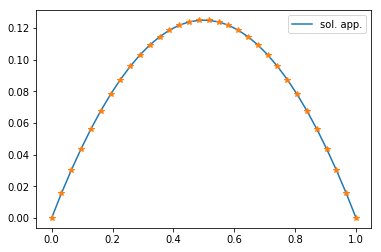

In [20]:
n=30
h=1/31
x=np.arange(0,1+h,h)
An=A(n)

Fn=(h**2)*F(x[1:-1])
U=np.zeros(n+2)
U[1:-1]=np.linalg.solve(An,Fn)

plt.plot(x,U,label='sol. app.')

plt.plot(x, -.5*x**2+.5*x,'*')
plt.legend()


## Exercice 1- La méthode du gradient à pas fixe

Soit $\mathcal J(x)$ la fonctionelle définie par 
\begin{equation}
\mathcal J(x)=\dfrac{1}{2}<x|A_n x>-<b|x>,
\end{equation}
où $<\cdot|\cdot>$ désigne le produit scalaire euclidien, $A_n\in\mathcal M_n(\mathbb R)$ et $b\in\mathbb R^n$.

**Q1)** Implementer $\mathcal J $ et $\nabla\mathcal J$ en utilsant deux fonctions `J(x,A,b)` et  `gradJ(x,A,b)`.
On rappelle que pour `A,b` donnés, on peut définir une fonction dans la seule variable `x` comme `gradJn =lambda x : gradJ(x,A,b)`. Utiliser la fonction `verifier_gradient` pour varifier d'avoir bien calculé le gradient de $\mathcal J$ en utilisant la matrice $A_n$ et le vecteur $F$ trouvé dans l'exercice 0. 



In [21]:

def J(x,A,b):
    return .5*x@A@x-np.dot(b,x)

def gradJ(x,A,b):
    return np.dot(A,x)-b

verifier_gradient(lambda x:J(x,An,Fn),lambda x:gradJ(x,An,Fn),np.random.rand(n))



erreur numerique dans le calcul du gradient: 9.94709e-12 (doit etre petit)


$$\newcommand{\nr}[1]{\left\Vert #1 \right\Vert}$$

**Q2)** 
La méthode de gradient à pas constant $\tau>0$ consiste à construire une
  suite minimisante définie par récurrence comme suit:
    $$\begin{cases} x_0 \in \mathbb R^n\\
    d^{(k)} = -\nabla J(x^{(k)}) \\
   x^{(k+1)} = x^{(k)} + \tau d^{(k)}
  \end{cases}$$
 Soit $T_\tau(x)=x-\tau\nabla J(x)=(I_n-\tau A)x+\tau b$ tel que $x^{(k+1)}=T_\tau(x^{(k)})$.
 
 **Q2.a)** Montrer que $x^\star=T_{\tau}(x^\star)$ où $x^\star$ est l'unique minimum de $J$.
 
 **Q2.b)** Donner une condition sur $\tau$ telle que $T_\tau$ est contactante.
 
 **Q2.c)** Montrer que la suite $(x^{(k)})$ converge vers $x^*$ quelque soit la valeur de $x_0$ et $\tau$ vérifiant la condition trouvée précédemment.
 
 **Q2.d)** *(bonus)* Montrer que le meilleur choix est $\tau^\star=\dfrac{2}{\lambda_{1}+\lambda_{n}}$, où $\lambda_1$ ($\lambda_n$) est la plus petite (grande) valeur propre de $A_n$. Calculer $\tau^\star$ à l'aide de la fonction `np.linalg.eigvalsh`.
 
**Réponse:** 

 **Q2.a)** Soit $x^\star$ l'unique minimiseur de $J$ alors
 $$ T_\tau(x^*)=x^*-\tau\underbrace{\nabla J(x^*)}_{=0}=x^*. $$
  
 **Q2.b)**  Soient $x,y\in\Rsp^d$ alors on a 
 $$\nr{T_\tau(x)-T_\tau(y)}=\nr{(I_n-\tau A)(x-y)}\leq L\nr{x-y},  $$
  où $L=\max_{1\leq i\leq n}|1-\tau \lambda_i|$ et $\lambda_i$ sont les valeurs propres de $A$.
 En imposant $L<1$ on obtient que si $\tau\in(0,\frac{2}{\lambda_n})$ (où $\lambda_n$ est la plus grande valeur propre de $A$), alors l'application $T_\tau$ est contactante.
 
 **Q2.c)** Soient $x_0\in\Rsp^d$ et $\tau\in(0,\frac{2}{\lambda_n})$ on a 
 $$ \nr{x^{(k)}-x^*}=\nr{T_\tau(x^{(k-1)})-T_\tau(x^*)}\leq L \nr{x^{(k-1)}-x^*}\leq L^k\nr{x_0-x^*}, $$
 d'où la convergence comme $L<1$. 




In [22]:
lamb=np.linalg.eigvalsh(A(50))
tau_star=2/(min(lamb)+max(lamb))
print(tau_star)


0.5


**Q3)** Implémenter l'algorithme du gradient à travers une fonction de la forme 

`gradient_fixe(gradJ,x0,tau,epsilon,iterMax) `

prennant en argument le gradient `gradJ`, la valeur initiale `x0`, le pas `tau`, le nombre maximal d'iterations autorisées `IterMax` et la tolerance `epsilon`. Cette fonction devra retourner:
- `x` dernier terme de la suite. 
- `err` liste de $\parallel \nabla \mathcal J(\bf u_k)\parallel$.




In [23]:
def gradient_fixe(gradJ,x0,tau,epsilon,iterMax):
    err=[]
    x=x0;
    it=0
    while it<=iterMax:
        d=-gradJ(x)
        x=x+tau*d
        err.append(np.linalg.norm(gradJ(x)))
        if np.linalg.norm(gradJ(x))<=epsilon :
            break
        it+=1
    print("erreur %g après %g itérations" %(np.linalg.norm(gradJ(x)),it))
    return x,err 


**Q4)**  Pour $n=20,50,100$ résoudre le systéme trouvé dans l'exercice 0 et  tracer sur la même figure les solutions approchées. On prendra $\tau=0.1$ et $\epsilon=10^{-6}$. Tracer en échelle logarithmique `err` en fonction du nombre des itérations. Commenter les résultats.


erreur 9.99719e-07 après 4087 itérations
erreur 5.55901e-05 après 10001 itérations
erreur 0.000337026 après 10001 itérations


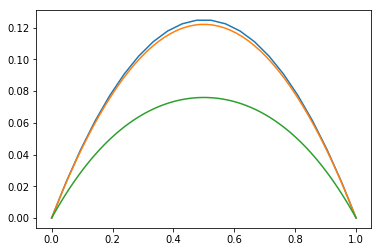

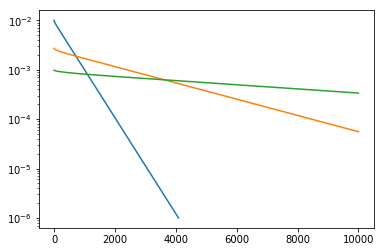

In [24]:
tau=0.1
epsilon=1.e-6
iterMax=10000
for n in [20,50,100]:
    
    h=1/(n+1)
    x=np.linspace(0,1,n+2)
    An=A(n)
    Fn=(h**2)*F(x[1:-1])
    U=np.zeros(n+2)
    U[1:-1],err=gradient_fixe(lambda x: gradJ(x,An,Fn),np.zeros(n),tau,epsilon,iterMax)
    plt.figure(1)
    plt.plot(x,U)
    plt.figure(2)
    plt.semilogy(err)
    


**Q5)** Reprendre l'expérience précédent en utlisant le meilleur choix de $\tau^\star$ trouvé au début de l'exercice. Commenter les résultats. 

erreur 9.99242e-07 après 1663 itérations
erreur 9.98336e-07 après 4115 itérations
erreur 7.02102e-06 après 10001 itérations


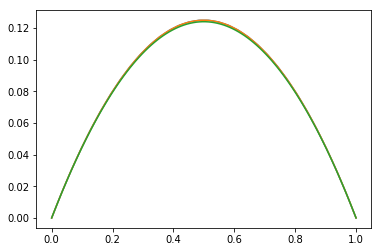

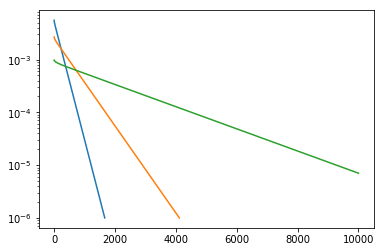

In [25]:
epsilon=1.e-6
iterMax=10000
for n in [30,50,100]:
    
    h=1/(n+1)
    x=np.linspace(0,1,n+2)
    An=A(n)
    lamb=np.linalg.eigvalsh(An)
    tau_star=2/(min(lamb)+max(lamb))
    Fn=(h**2)*F(x[1:-1])
    U=np.zeros(n+2)
    U[1:-1],err=gradient_fixe(lambda x: gradJ(x,An,Fn),np.zeros(n),tau_star,epsilon,iterMax)
    plt.figure(1)
    plt.plot(x,U)
    plt.figure(2)
    plt.semilogy(err)
    


## Exercice 2- La méthode du gradient à pas optimal

On rappelle que les iterées de la  methode du gradient à pas optimal sont définies comme

$$\begin{cases} d^{(k)} = - \nabla \mathcal J (x^{(k)}) \\
    \tau^{(k)} = \frac{\langle d^{(k)}|d^{(k)}\rangle}{\langle d^{(k)}|A d^{(k)}\rangle}\\
    x^{(k+1)} = x^{(k)} + \tau^{(k)}d^{(k)}
  \end{cases}$$
  
**Q0)** On veut montrer que la suite des itérées $(x^{(k)})$ converge vers l'unique minimiseur $x^\star$.

**Q0.a)** Montrer que 
$$ J(x^{(k+1)})= J(x^{(k)})-\dfrac{\tau^{(k)}}{2}\nr{\nabla J(x^{(k)})}^2$$
et en déduire que
$$ J(x^{(k+1)})\leq J(x^{(k)})-\dfrac{1}{2\lambda_{n}}\nr{\nabla J(x^{(k)})}^2,$$
où $\lambda_n$ est la plus grande valeur propre de $A$. 

**Q0.b)** Montrer alors que pour tout $K\geq 0$ on a l'inégalité suivante
$$ \sum_{0\leq k\leq K}\nr{\nabla J(x^{(k)})}^2\leq 2\lambda_n(J(x^{(0)})-J(x^\star)) $$
et en déduire que $\lim_{k\to\infty}\nr{\nabla J(x^{(k)})}=0$.

**Q0.c)**  Conclure que 	$x^{(k)}\to x^\star$.

  
**Réponse:** 
 
**Q0.a)** On va developper $J(x^{(k+1)})$ en sachant que $x^{(k+1)}=x^{(k)}+\tau^{(k)}d^{(k)}$  
 
 \begin{equation*}
 \begin{split}
 J(x^{(k+1)})=&\;\dfrac{1}{2} \sca{x^{(k)}+\tau^{(k)}d^{(k)}}{A(x^{(k)}+\tau^{(k)}d^{(k)})}-\sca{b}{x^{(k)}+\tau^{(k)}d^{(k)}}\\
 =&\;J(x^{(k)})+\tau^{(k)}\sca{Ax^{(k)}-b}{d^{(k)}}+\dfrac{1}{2}(\tau^{(k)})^2\sca{d^{(k)}}{Ad^{(k)}}\\
 =&\;J(x^{(k)})-\tau^{(k)}\underbrace{\nr{\nabla J(x^{(k)})}^2}_{d^{(k)}=-\nabla J(x^{(k)})}+\dfrac{1}{2}\underbrace{\tau^{(k)}\nr{\nabla J(x^{(k)})}^2}_{\tau^{(k)}=\frac{\sca{d^{(k)}}{d^{(k)}}}{\sca{d^{(k)}}{A d^{(k)}}}}\\
 =&\;J(x^{(k)})-\dfrac{\tau^{(k)}}{2}\nr{\nabla J(x^{(k)})}^2.
 \end{split}
 \end{equation*}
Comme $\sca{d^{(k)}}{A d^{(k)}}\leq \lambda_n\nr{d^{(k)}}^2$, on a bien que $\tau^{(k)}\geq \frac{1}{\lambda_n}$, d'où l'inegalité
 $$ J(x^{(k+1)})\leq J(x^{(k)})-\dfrac{1}{2\lambda_{n}}\nr{\nabla J(x^{(k)})}^2.$$
 
**Q0.b)** Ci-dessus on a obtenu que 
$$ \nr{\nabla J(x^{(k)})}^2\leq 2\lambda_n(J(x^{(k)})-J(x^{(k+1)})).$$
 Ainsi, pour tout $K\geq 0$ on a
$$ \sum_{0\leq k\leq K}\nr{\nabla J(x^{(k)})}^2\leq 2\lambda_n(J(x^{(k)})-J(x^{(K)}))\leq 2\lambda_n(J(x^{(0)})-J(x^\star)). $$
La série de terme général $\nr{\nabla J(x^{(k)})}^2$ est donc convergente et on en déduit que $\lim_{k\to\infty}\nr{\nabla J(x^{(k)})}=0$.

**Q0.c)** Comme $J(x^{(k)})\leq J(x_0)$ on a que $x^{(k)}\in S_0$, qui est compact comme l'on a démontré dans l'exercice 1. 
On peut alors soustraire une sous-suite $x^{(k_n)}$ qui converge vers une valeur d'adherence $\bar{x}\in S_0$. Par continuité de $\nabla J$, on obtient aussi que $\nabla J(\bar{x})$ d'où $\bar{x}=x^*$ par unicité du minimiseur.
Ainsi, comme la  suite $x^{(k)}$ est bornée et admet une unique valeur d'adherence, on a que $x^{(k)}\to x^*$.
  
  





<div class="alert alert-block alert-danger">
<b>Vitesse de convergence </b>

On définit le conditionnement de $A$ comme $\kappa(A)=\frac{\lambda_n}{\lambda_1}$ où $\lambda_1$ ($\lambda_n$) désigne la plus petite (grande) valeur propre de $A$. Dans le cas du gradient à pas optimal on obtient alors l'inégalité suivante 
$$ J(x^{(k)})-J(x^\star)\leq \Big( \dfrac{\kappa(A)-1}{\kappa(A)+1} \Big)^{2k}(J(x^{(0)})-J(x^\star)). $$
On en déduit que plus $\kappa(A)$ est proche de $1$, plus la méthode  du gradient à pas optimal converge rapidement. 
Par contre lorsque $\kappa(A)$ est grand, c'est-à-dire lorsque les valeurs propres extrêmes sont très différentes, la méthode est très lente.

Pour plus des détails voir Hirriart-Urruty, *Optimisation et analyse convexe*, p 17-19 et p 53-56.
</div>

**Q1)** Implémenter l'algorithme du gradient à pas optimal à travers une fonction de la forme 

`gradient_optimal(J,gradJ,A,x0,epsilon,iterMax) `

prennant en argument la fonction `J`, le gradient `gradJ`,la matrice `A`, la valeur initiale `x0`, le pas `tau`, le nombre maximal d'iterations autorisées `IterMax` et la tolerance `epsilon`. Cette fonction devra retourner:
- `x` dernier terme de la suite. 
- `err` liste de $\parallel \nabla \mathcal J(\bf u_k)\parallel$.
- `F` liste de $\mathcal J(x^{(k)})$.

In [26]:
def gradient_optimal(J,gradJ,A,x0,epsilon,iterMax):
    err=[]
    F=[]
    x=x0;
    it=0
    while it<=iterMax:
        d=-gradJ(x)
        tau=np.dot(d,d)/np.dot(d,np.dot(A,d))
        x=x+tau*d
        err.append(np.linalg.norm(gradJ(x)))
        F.append(J(x))
        if np.linalg.norm(gradJ(x))<=epsilon :
            break
        it+=1
    print("erreur %g après %g itérations" %(np.linalg.norm(gradJ(x)),it))
    return x,err,F 


**Q2)**  Pour $n=20,50,100$ résoudre le systéme trouvé dans l'exercice 0 et  tracer sur la même figure les solutions approchées. On prendra $\epsilon=10^{-6}$. Tracer en échelle logarithmique `err` en fonction du nombre des itérations. Afficher pour chaque $n$ le conditionnement de $A_n$ et commenter les résultats.

erreur 9.98615e-07 après 807 itérations
conditionnement de A 178
erreur 9.97569e-07 après 4231 itérations
conditionnement de A 1053
erreur 9.99679e-07 après 14627 itérations
conditionnement de A 4133


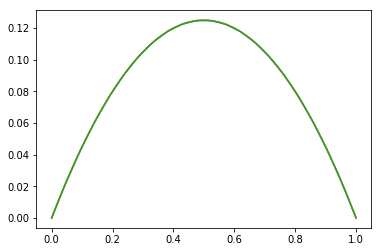

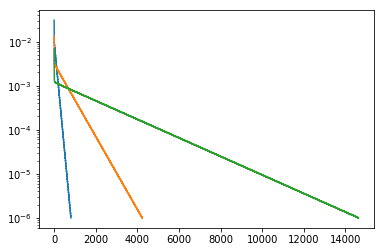

In [34]:
epsilon=1.e-6
iterMax=20000
for n in [20,50,100]:
    
    h=1/(n+1)
    x=np.linspace(0,1,n+2)

    An=A(n)
    Fn=(h**2)*F(x[1:-1])
    U=np.zeros(n+2)
    U[1:-1],err,Fun=gradient_optimal(lambda u: J(u,An,Fn),lambda u: gradJ(u,An,Fn),An,np.zeros(n),epsilon,iterMax)
    plt.figure(1)
    plt.plot(x,U)
    plt.figure(2)
    plt.semilogy(err)
    print("conditionnement de A %d" %np.linalg.cond(An))
    


## Exercice 3 - La méthode du gradient conjugué

$\newcommand{\sca}[2]{\langle#1|#2\rangle}$

L'idée principale est de choisir des directions de descentes qui soient orthogonales les unes aux autres pour le produit scalaire $\sca{x}{y}_A = \sca{x}{A y}$ induit par la matrice $A$.  La méthode
  du gradient conjugué prend la forme suivante: on fixe $x_0=0$, puis
  pour $k\geq 0$,
\begin{equation}
\label{eq:a}
\left\{
\begin{aligned}
&g^{(k)} =  b - A x^{(k)}\\
&p^{(k)} = g^{(k)}- \frac{\sca{Ap^{(k-1)}}{g^{(k)}}}{\sca{A p^{(k-1)}}{p^{(k-1)}}} p^{(k-1)}\\
&\tau^{(k)} = \frac{\sca{p^{(k)}}{g^{(k)}}}{\sca{A p^{(k)}}{p^{(k)}}}\\
&x^{(k+1)} = x^{(k)} + \tau^{(k)} p^{(k)}
\end{aligned}
\right.
\end{equation}


**Q1)** Implémenter l'algorithme du gradient conjugué à travers une fonction de la forme 

`gradient_conj(A,b,x0,epsilon,iterMax) `

prennant en argument la matrice `A`, le vecteur `b`, la valeur initiale `x0`, le nombre maximal d'iterations autorisées `IterMax` et la tolerance `epsilon`. Cette fonction devra retourner:
- `x` dernier terme de la suite. 
- `err` liste de $\parallel \nabla \mathcal J(\bf u_k)\parallel$.


In [2]:

def gradient_conj(A,b,x0,epsilon,iterMax):
    err=[]
    x=x0
    it=0
    g=b-np.dot(A,x)
    p=g
    while(it<=iterMax):
        tau=np.dot(p,g)/np.dot(np.dot(A,p),p)
        x=x+tau*p
        g=b-np.dot(A,x)
        p=g-(np.dot(np.dot(A,p),g)/np.dot(np.dot(A,p),p))*p
        err.append(np.linalg.norm(np.dot(A,x)-b))
        if np.linalg.norm(np.dot(A,x)-b)<=epsilon:
            break
        it+=1
    print("erreur %g après %g itérations" %(np.linalg.norm(np.dot(A,x)-b),it))
    return x,err
        



**Q2)** Pour $n=20,50,100$ résoudre le systéme trouvé dans l'exercice 0 et  tracer sur la même figure les solutions approchées. On prendra $\epsilon=10^{-6}$. Tracer en échelle logarithmique `err` en fonction du nombre des itérations et commenter les résultats.


erreur 7.8887e-17 après 9 itérations
erreur 1.25627e-16 après 24 itérations
erreur 3.28177e-16 après 49 itérations


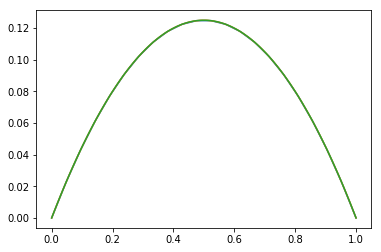

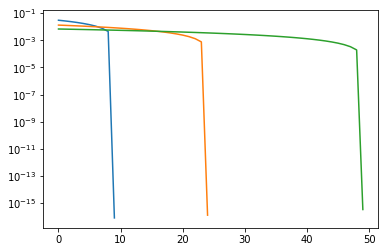

In [12]:
epsilon=1.e-6
iterMax=10000
for n in [20,50,100]:
    
    h=1/(n+1)
    x=np.linspace(0,1,n+2)

    An=A(n)
    Fn=(h**2)*F(x[1:-1])
    U=np.zeros(n+2)
    U[1:-1],err=gradient_conj(An,Fn,np.zeros(n),epsilon,iterMax)
    plt.figure(1)
    plt.plot(x,U)
    plt.figure(2)
    plt.semilogy(err)
    



## Exercice 4- Application : régularisation de signaux 

Dans cette partie on s'intéresse à un problème de débruitage. Étant donné un signal 1D $v:[0,1]\to\mathbb{R}$ continu et un paramètre $\alpha > 0$, on cherche à construire un signal régularisé en résolvant l'équation différentielle

$$
(D)\hspace{3cm} \left\{\begin{aligned}
&-u''(t) + \alpha (u(t) - v(t)) = 0 \hbox{ sur } (0,1) \\
&u'(0) = u'(1) = 0
\end{aligned}\right.,$$

que l'on discrétise comme dans la section précédente.

**Q1)** Poser $U = (u_0,\dots, u_{N+1})$ et écrire le système sous la forme $A_n U = F$ où la matrice $A_n$ et le vecteur $F$ sont à construire. Montrer que la matrice $A_n$ est symétrique et définie positive. Écrire une fonction `Areg(n,alpha)` construisant la matrice $A_n$.

In [13]:
def Areg(n,alpha):
    return 2*np.eye(n)-np.diag(np.ones(n-1),1)-np.diag(np.ones(n-1),-1)+alpha*np.eye(n)/(n+1)**2



 **Q2)**  En utilisant les agorithmes de descente de gradient, résoudre le système à partir du signal $v$ donné ci-dessous (une somme de Gaussiennes auquelles on a rajouté un bruit uniforme),  pour $\alpha\in\{50,100,1000\}$ et $n=50$. Tracer les solutions sur la même figures et commenter.

conditionnement de A = 682
erreur 9.98353e-07 après 3559 itérations
erreur 9.98282e-07 après 3501 itérations
erreur 7.98953e-07 après 93 itérations
conditionnement de A = 372
erreur 9.99787e-07 après 2070 itérations
erreur 9.92223e-07 après 2023 itérations
erreur 8.55383e-07 après 90 itérations
conditionnement de A = 41
erreur 9.64391e-07 après 279 itérations
erreur 9.58173e-07 après 257 itérations
erreur 9.21345e-07 après 43 itérations


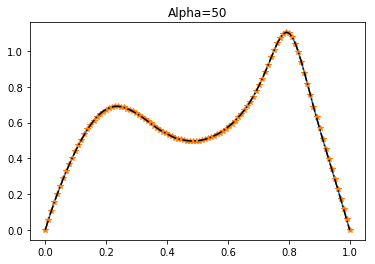

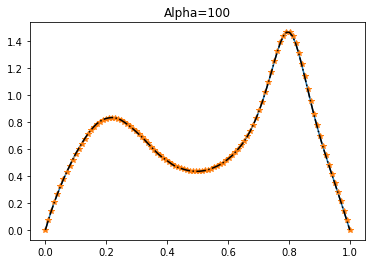

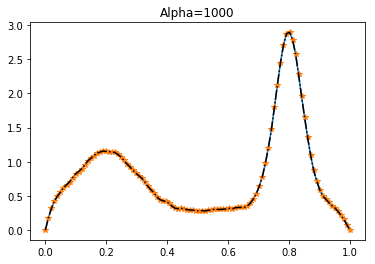

In [14]:
n=100
h=1/(n+1)
t = np.linspace(0,1,n+2)
v = 4*np.exp(-500*np.square(t-.8)) + np.exp(-50*np.square(t-.2))
v = v + .5*np.random.random(n+2) 

epsilon=1.e-6
iterMax=10000


for alpha in [50,100,1000]:
    Ar=Areg(n,alpha)
    b=h**2*alpha*v[1:-1]
    U1=np.zeros(n+2)
    lamb=np.linalg.eigvalsh(Ar)
    tau_star=2/(min(lamb)+max(lamb))
    print("conditionnement de A = %d" %np.linalg.cond(Ar))
    U1[1:-1],err1=gradient_fixe(lambda x: gradJ(x,Ar,b),np.zeros(n),tau_star,epsilon,iterMax)
    U2=np.zeros(n+2)
    U2[1:-1],err2,Fun=gradient_optimal(lambda u: J(u,Ar,b),lambda u: gradJ(u,Ar,b),Ar,np.zeros(n),epsilon,iterMax)
    U3=np.zeros(n+2)
    U3[1:-1],err3=gradient_conj(Ar,b,np.zeros(n),epsilon,iterMax)
    plt.figure()
    plt.plot(t,U1)
    plt.plot(t,U2,'*')
    plt.plot(t,U3,'-.k')
    plt.title("Alpha=%d" %alpha)
    






